# Plotting running times of search algoritms

Basic imports

In [436]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

Let's plot how capacity evolves with different algorithms for dynamic array capacity expansion

```

```

In [437]:
# this function must return an array with n*2 elements, reporting the capacity level
# at each time step considering linear expansion, considering n appends followed by n removes
def linear_expansion(n, dgrow = 500, dshrink = 1000):
    arr = np.array([])

    for i in range(0, n):
        if (len(arr) == 0):
            arr = np.append(arr, [0])
        if (i > arr[i-1]):
            arr = np.append(arr, [i + dgrow])
        else:
            arr = np.append(arr, [arr[i-1]])

    m = n
    for i in range(n, 1, -1):
        if (arr[m-1] - i > dshrink):
            arr = np.append(arr, [i + dgrow])
        else:
            arr = np.append(arr, [arr[m-1]])
        m = m+1

    return arr

# this function must return an array with n*2 elements, reporting the capacity level
# at each time step considering geometric expansion, considering n appends followed by n removes
def geometric_expansion(n, fgrow = 5., fshrink = 5.5):
    arr = np.array([])

    for i in range(0, n):
        if (len(arr) == 0):
            arr = np.append(arr, [0])
        if (i > arr[i-1]):
            arr = np.append(arr, [i * fgrow])
        else:
            arr = np.append(arr, [arr[i-1]])

    m = n
    for i in range(n, 1, -1):
        if (arr[m-1]/i > fshrink):
            arr = np.append(arr, [i * fgrow])
        else:
            arr = np.append(arr, [arr[m-1]])
        m = m+1
    return arr

In [438]:
n = 10000
xs = np.arange(2*n)
# xs = np.append(xs, xs)

In [439]:
xs

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [440]:
linear_expansion(n)
geometric_expansion(n)

array([ 0.,  0.,  5., ..., 20., 15., 10.])

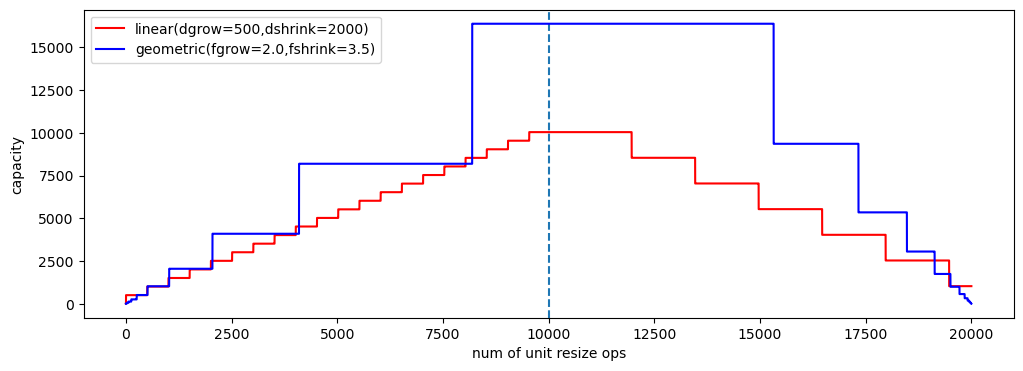

In [441]:


dgrow = 500
dshrink = 2000
fgrow = 2.0
fshrink = 3.5
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(12,4)
ax1.axvline(x=n, linestyle='--')
ax1.set_ylabel("capacity")
ax1.set_xlabel("num of unit resize ops")
ax1.plot(xs, linear_expansion(n, dgrow, dshrink), label=f"linear(dgrow={dgrow},dshrink={dshrink})", color='red')
ax1.plot(xs, geometric_expansion(n, fgrow, fshrink), label=f"geometric(fgrow={fgrow},fshrink={fshrink})", color='blue')
ax1.legend(loc='upper left')
plt.show()